# DATA 605 - Dimensionality Reduction Exercise

World Developmemt Indicators data from https://databank.worldbank.org/reports.aspx?source=world-development-indicators

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
worldbank_data_url = 'https://drive.google.com/uc?export=download&id=1EtNlb935g5Jo3Hvsc5OUiYMJcCJCXY0l'
df_wdi = pd.read_csv(worldbank_data_url)
df_wdi.head(8)

,Country,Fertility rate (births/woman),Life expectancy at birth (years),GDP (USD),Population density (people/km2),GDP per capita growth (%/yr),Income per capita (USD),CO2 emissions (tons per capita)
0,Qatar,2.070,79.108000,1.251223e+11,159.890353,6.618785,41865.062795,39.059708
1,Cameroon,5.111,55.101000,2.614382e+10,43.031121,0.619380,1059.839636,0.333327
2,Ethiopia,5.136,61.627000,2.993379e+10,87.639964,9.460597,259.077562,0.075148
3,Mauritania,4.980,62.527000,4.337794e+09,3.390118,1.751621,836.635449,0.640167
4,Saudi Arabia,2.970,73.917000,5.282072e+11,12.756007,2.008917,15762.798652,18.908248
5,Mexico,2.340,75.065000,1.057801e+12,58.691305,3.617189,7362.916552,4.069560
6,Cambodia,2.875,66.560000,1.124228e+10,81.079832,4.344574,660.406992,0.350246
7,Slovak Republic,1.430,75.112195,9.018399e+10,112.108875,5.622368,12941.002702,6.721960


In [ ]:
df_wdi = df_wdi.dropna()
df_wdi.head(8)

,Country,Fertility rate (births/woman),Life expectancy at birth (years),GDP (USD),Population density (people/km2),GDP per capita growth (%/yr),Income per capita (USD),CO2 emissions (tons per capita)
0,Qatar,2.070,79.108000,1.251223e+11,159.890353,6.618785,41865.062795,39.059708
1,Cameroon,5.111,55.101000,2.614382e+10,43.031121,0.619380,1059.839636,0.333327
2,Ethiopia,5.136,61.627000,2.993379e+10,87.639964,9.460597,259.077562,0.075148
3,Mauritania,4.980,62.527000,4.337794e+09,3.390118,1.751621,836.635449,0.640167
4,Saudi Arabia,2.970,73.917000,5.282072e+11,12.756007,2.008917,15762.798652,18.908248
5,Mexico,2.340,75.065000,1.057801e+12,58.691305,3.617189,7362.916552,4.069560
6,Cambodia,2.875,66.560000,1.124228e+10,81.079832,4.344574,660.406992,0.350246
7,Slovak Republic,1.430,75.112195,9.018399e+10,112.108875,5.622368,12941.002702,6.721960


In [ ]:
country = df_wdi['Country'].dropna()  # Extract the country name
df_vals_only = df_wdi.drop('Country', axis = 1)

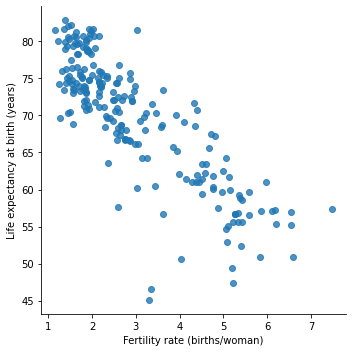

In [ ]:
# A quick plot for comparison later
sns.lmplot(data=df_wdi, x='Fertility rate (births/woman)', y='Life expectancy at birth (years)', fit_reg=False) 

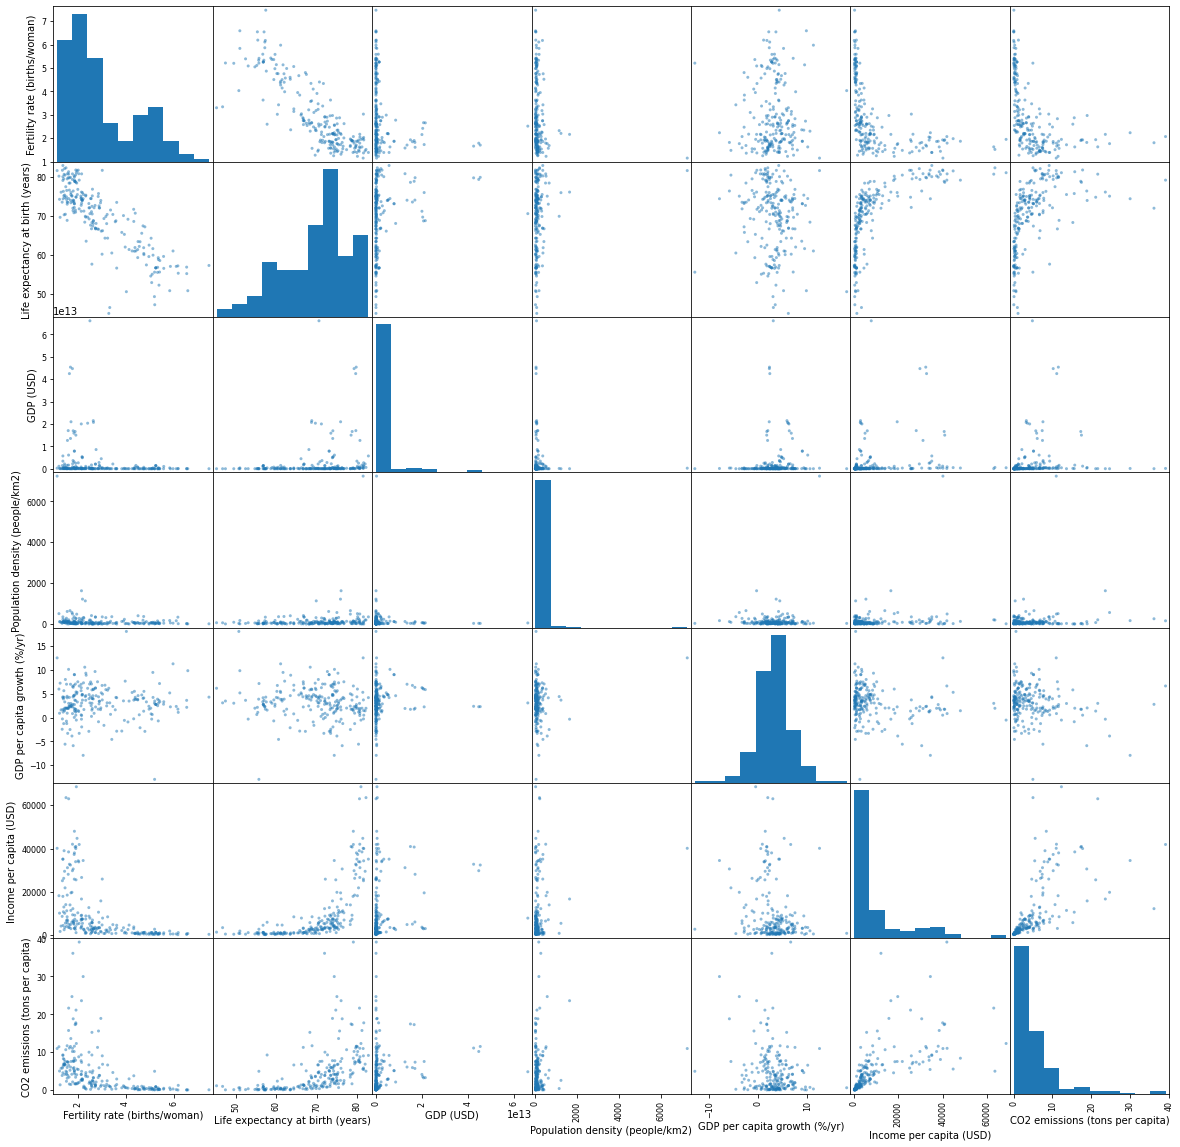

In [ ]:
_ = pd.plotting.scatter_matrix(df_wdi,figsize=(20,20))

In [ ]:
# Scale data and convert back to a DataFrame
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_scaled = scale.fit_transform(df_vals_only)
df_scaled = pd.DataFrame(df_scaled) 
df_scaled.columns = [df_vals_only[:0]]
df_scaled.head()

,Fertility rate (births/woman),Life expectancy at birth (years),GDP (USD),Population density (people/km2),GDP per capita growth (%/yr),Income per capita (USD),CO2 emissions (tons per capita)
0,-0.617431,1.116694,-0.298998,0.013835,0.992196,2.449841,5.685177
1,1.498633,-1.729165,-0.311716,-0.212890,-0.736737,-0.630877,-0.738170
2,1.516029,-0.955554,-0.311229,-0.126342,1.811161,-0.691333,-0.780993
3,1.407477,-0.848866,-0.314518,-0.289800,-0.410443,-0.647728,-0.687276
4,0.008829,0.501338,-0.247202,-0.271629,-0.336294,0.479169,2.342757


In [ ]:
# Run PCA on the feature set dataframe
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principle_components = pca.fit_transform(df_scaled)

# Stick back into a DataFrame with the original country labels
df_pca = pd.DataFrame(principle_components)
df_pca = pd.concat([df_pca, pd.Series(country.array)], axis = 1)
df_pca.columns = ['pc1','pc2','country']
df_pca.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,pc1,pc2,country
0,4.448002,-0.172510,Qatar
1,-2.257425,-0.885925,Cameroon
2,-2.195956,1.181433,Ethiopia
3,-1.789256,-0.625534,Mauritania
4,1.498549,-0.809382,Saudi Arabia


## Inspect the resulting principle components

In [ ]:
# Putting component values into a dataframe + adding labels improves readability
components = pd.DataFrame(pca.components_)
components.columns = df_vals_only.columns
components

,Fertility rate (births/woman),Life expectancy at birth (years),GDP (USD),Population density (people/km2),GDP per capita growth (%/yr),Income per capita (USD),CO2 emissions (tons per capita)
0,-0.484945,0.520472,0.166040,0.135916,-0.116241,0.483606,0.447781
1,-0.156865,0.049770,0.134459,0.571515,0.773161,-0.098522,-0.143955


## Scree plot using Seaborn

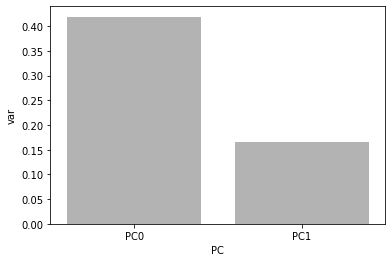

In [ ]:
# Create a new dataframe with explained variance vals for each PC
explained_variance = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC'+ str(i) for i in range(pca.n_components_)]})
sns.barplot(x='PC',y="var", data=explained_variance, color='.7');

## Biplot using Seaborn

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


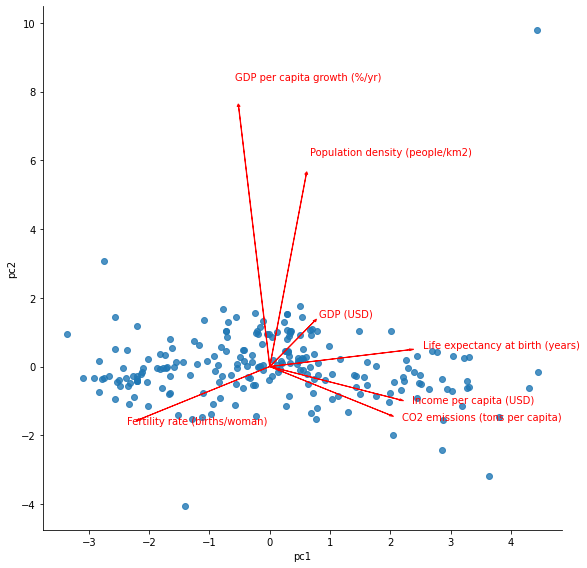

In [ ]:
# Plot using the Principle Components as Axes
sns.lmplot(data=df_pca, x='pc1', y='pc2', fit_reg=False, height=8)

# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original feature**
xvector = pca.components_[0]
yvector = pca.components_[1]
 
# value of the first two PCs, set the x, y axis boundary
xs = pca.transform(df_scaled)[:,0]
ys = pca.transform(df_scaled)[:,1]

# label countries
#for row in range(0,df_pca.shape[0]):
#      plt.text(df_pca.pc1[row]+0.01, df_pca.pc2[row], 
#      df_pca.country[row], horizontalalignment='left', 
#      size='small', color='grey', weight='light')

# arrows project features (columns from csv) as vectors onto PC axes
for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(df_vals_only.columns.values)[i], color='r')

 